## Importacion de Librerias

In [1]:
import pandas as pd
import sys
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sqlite3
from datetime import datetime, timedelta
import random

%matplotlib inline

### Cargamos Data2.csv

In [2]:
csv_1_file = 'data/Data2.csv'
df_1 = pd.read_csv(csv_1_file, encoding='latin1')  # usamos 'latin1' o algun decodificador

In [3]:
df_1.head()

,id_aspirante,usuarios_id,nombres,apellidos,carrera,prov_nace,canton_nace
0,11705,150,ROXANA LILIBETH,ROMERO VERA,EDUCACION INICIAL,SANTA ELENA,SANTA ELENA
1,3,411,JORGE LUIS,YELA RIVERA,INGENIERIA EN PETROLEO,OTRA,OTRO
2,1,414,CARMEN CECILIA,AGURTO TORRES,ADMINISTRACION DE EMPRESAS,SANTA ELENA,LA LIBERTAD
3,2,459,JOEL OSWALDO,ALEJANDRO CRUZ,ADMINISTRACION DE EMPRESAS,SANTA ELENA,SANTA ELENA
4,4,460,SANDY MELISSA,YAGUAL RIVAS,INGENIERIA EN PETROLEO,GUAYAS,GUAYAQUIL


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23322 entries, 0 to 23321
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_aspirante  23322 non-null  int64 
 1   usuarios_id   23322 non-null  int64 
 2   nombres       23322 non-null  object
 3   apellidos     23322 non-null  object
 4   carrera       23322 non-null  object
 5   prov_nace     20407 non-null  object
 6   canton_nace   20407 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


### Cargamos data_2.db de la base de datos sql

In [5]:
# Connect to the SQLite database
db_path = 'data/data_2.db'
connection = sqlite3.connect(db_path)

# Read data from the table (use a valid SELECT query)
table_name = 'data_columnas_H-O'
query = f"SELECT * FROM '{table_name}'"
df_2 = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

In [6]:
df_2.head()

,nacionalidad,genero,fecha_nacimiento,fecha_reg_aspirante,id_usuario,num_accesos,habilitado,fec_ult_acceso
0,ECUATORIANA,F,1990-05-26 00:00:00.000,2018-08-28 14:31:05.000,150,58,0,2019-04-17 10:25:07.000
1,ECUADOR,M,None,2013-08-14 14:42:39.467,411,92,1,2016-02-12 11:46:10.000
2,ECUADOR,F,None,2013-08-14 14:42:38.577,414,56,1,2015-02-26 12:16:50.000
3,ECUADOR,M,None,2013-08-14 14:42:38.593,459,322,1,2019-08-20 22:28:08.000
4,ECUADOR,F,None,2013-08-14 15:16:30.857,460,2,1,2013-08-23 17:17:02.000


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23322 entries, 0 to 23321
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nacionalidad         22037 non-null  object
 1   genero               21149 non-null  object
 2   fecha_nacimiento     15650 non-null  object
 3   fecha_reg_aspirante  23322 non-null  object
 4   id_usuario           23322 non-null  int64 
 5   num_accesos          23322 non-null  int64 
 6   habilitado           23322 non-null  int64 
 7   fec_ult_acceso       23322 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.4+ MB


### Unimos las 2 bases de datos

In [8]:
#df_3 = pd.concat([df_1, df_2])
df_3 = pd.merge(df_1, df_2, left_on='usuarios_id', right_on='id_usuario', how='left')
df_3.head()

,id_aspirante,usuarios_id,nombres,apellidos,carrera,prov_nace,canton_nace,nacionalidad,genero,fecha_nacimiento,fecha_reg_aspirante,id_usuario,num_accesos,habilitado,fec_ult_acceso
0,11705,150,ROXANA LILIBETH,ROMERO VERA,EDUCACION INICIAL,SANTA ELENA,SANTA ELENA,ECUATORIANA,F,1990-05-26 00:00:00.000,2018-08-28 14:31:05.000,150,58,0,2019-04-17 10:25:07.000
1,3,411,JORGE LUIS,YELA RIVERA,INGENIERIA EN PETROLEO,OTRA,OTRO,ECUADOR,M,None,2013-08-14 14:42:39.467,411,92,1,2016-02-12 11:46:10.000
2,1,414,CARMEN CECILIA,AGURTO TORRES,ADMINISTRACION DE EMPRESAS,SANTA ELENA,LA LIBERTAD,ECUADOR,F,None,2013-08-14 14:42:38.577,414,56,1,2015-02-26 12:16:50.000
3,2,459,JOEL OSWALDO,ALEJANDRO CRUZ,ADMINISTRACION DE EMPRESAS,SANTA ELENA,SANTA ELENA,ECUADOR,M,None,2013-08-14 14:42:38.593,459,322,1,2019-08-20 22:28:08.000
4,4,460,SANDY MELISSA,YAGUAL RIVAS,INGENIERIA EN PETROLEO,GUAYAS,GUAYAQUIL,ECUADOR,F,None,2013-08-14 15:16:30.857,460,2,1,2013-08-23 17:17:02.000


In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23322 entries, 0 to 23321
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_aspirante         23322 non-null  int64 
 1   usuarios_id          23322 non-null  int64 
 2   nombres              23322 non-null  object
 3   apellidos            23322 non-null  object
 4   carrera              23322 non-null  object
 5   prov_nace            20407 non-null  object
 6   canton_nace          20407 non-null  object
 7   nacionalidad         22037 non-null  object
 8   genero               21149 non-null  object
 9   fecha_nacimiento     15650 non-null  object
 10  fecha_reg_aspirante  23322 non-null  object
 11  id_usuario           23322 non-null  int64 
 12  num_accesos          23322 non-null  int64 
 13  habilitado           23322 non-null  int64 
 14  fec_ult_acceso       23322 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.7+ MB


### Visualizamos la cantidad de campos nulos

In [10]:
df_3.isnull().sum() # Revizar si existen datos nulos

id_aspirante              0
usuarios_id               0
nombres                   0
apellidos                 0
carrera                   0
prov_nace              2915
canton_nace            2915
nacionalidad           1285
genero                 2173
fecha_nacimiento       7672
fecha_reg_aspirante       0
id_usuario                0
num_accesos               0
habilitado                0
fec_ult_acceso            0
dtype: int64

### Tomamos un estudiante de muestra y procedemos a crear datos random
### para ir ralizando los cambios al datafram y no perder la mayoria de datos

In [11]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                   NaN
canton_nace                                 NaN
nacionalidad                               None
genero                                        F
fecha_nacimiento                           None
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

### Cambiamos fechas de nacimiento con valores NUll a valores random

In [12]:
# Funcion para generar fechas random entre los anios 1950 a 2010
def random_fecha_nacimiento(start_year=1980, end_year=2010):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    delta_days = (end_date - start_date).days
    random_days = np.random.randint(0, delta_days)
    return start_date + timedelta(days=random_days)

In [13]:
# Replazamos NAN con fechas de nacimiento
df_3['fecha_nacimiento'] = df_3['fecha_nacimiento'].apply(
    lambda x: random_fecha_nacimiento() if pd.isna(x) else x
)

In [14]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                   NaN
canton_nace                                 NaN
nacionalidad                               None
genero                                        F
fecha_nacimiento            1981-03-05 00:00:00
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

### Remplazamos valores nulos por valores random de provincias

In [15]:
# Algunas provincias con sus cantones
ecuador_locaciones = {
    'Pichincha': ['Quito', 'Cayambe', 'Rumiñahui'],
    'Santa Elena': ['Santa Elena', 'Salinas', 'La Libertad'],
    'Guayas': ['Guayaquil', 'Daule', 'Samborondón'],
    'Azuay': ['Cuenca', 'Gualaceo', 'Paute'],
    'Manabí': ['Portoviejo', 'Manta', 'Chone']
    # Anadir mas provincias y cantones si se necesita
}

# Convert province list
provincias = list(ecuador_locaciones.keys())

# Replace nulls in prov_nace with random provinces
df_3['prov_nace'] = df_3['prov_nace'].apply(
    lambda x: random.choice(provincias) if pd.isna(x) or str(x).strip().upper() in ['OTRO', 'OTRA'] else x
)



In [16]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                Manabí
canton_nace                                 NaN
nacionalidad                               None
genero                                        F
fecha_nacimiento            1981-03-05 00:00:00
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

#### Remplazamos cantones

In [17]:
# Remplazamos nulls de canton_nace basado en prov_nace
def assign_random_canton(row):
    canton = row['canton_nace']
    if pd.isna(canton) or str(canton).strip().upper() in ['OTRO', 'OTRA']:
        prov = row['prov_nace']
        return random.choice(ecuador_locaciones.get(prov, []))
    return canton

df_3['canton_nace'] = df_3.apply(assign_random_canton, axis=1)

In [18]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                Manabí
canton_nace                               Chone
nacionalidad                               None
genero                                        F
fecha_nacimiento            1981-03-05 00:00:00
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

### Cambiamos la nacionalidad a Ecuatoriana si es nulo el campo o si es diferente a la palabra Ecuatoriana

In [19]:
df_3['nacionalidad'] = df_3['nacionalidad'].apply(lambda x: 'ECUATORIANA' if pd.isna(x) or str(x).strip().upper() != 'ECUATORIANA' else x)

In [20]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                Manabí
canton_nace                               Chone
nacionalidad                        ECUATORIANA
genero                                        F
fecha_nacimiento            1981-03-05 00:00:00
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

### Cambiamos el genero de F y M a Femenino y Masculino respectivamente

In [21]:
df_3['genero'] = df_3['genero'].replace({'F': 'FEMENINO', 'M': 'MASCULINO'})

In [22]:
df_3.iloc[3871]

id_aspirante                               3834
usuarios_id                               13704
nombres                           ANA JACKELINE
apellidos                       TORRES SANCHÃZ
carrera                CONTABILIDAD Y AUDITORIA
prov_nace                                Manabí
canton_nace                               Chone
nacionalidad                        ECUATORIANA
genero                                 FEMENINO
fecha_nacimiento            1981-03-05 00:00:00
fecha_reg_aspirante     2015-08-24 12:47:32.000
id_usuario                                13704
num_accesos                                 346
habilitado                                    1
fec_ult_acceso          2021-05-13 19:20:08.000
Name: 3871, dtype: object

### Eliminamos las filas vacias de genero

In [23]:
df_3 = df_3.dropna(subset=['genero'])

In [24]:
df_3.isnull().sum() # Revizar si existen datos nulos

id_aspirante           0
usuarios_id            0
nombres                0
apellidos              0
carrera                0
prov_nace              0
canton_nace            0
nacionalidad           0
genero                 0
fecha_nacimiento       0
fecha_reg_aspirante    0
id_usuario             0
num_accesos            0
habilitado             0
fec_ult_acceso         0
dtype: int64

#### Cambiamos todas las columnas a Mayusculas

In [25]:
for col in df_3.select_dtypes(include='object').columns:
    df_3.loc[:, col] = df_3[col].map(lambda x: x.upper() if isinstance(x, str) else x)

### Eliminamos Espacios en blanco Iniciales y finales

In [26]:
df_3.loc[:, col] = df_3[col].map(lambda x: x.strip().upper() if isinstance(x, str) else x)

In [27]:
df_3.head()

,id_aspirante,usuarios_id,nombres,apellidos,carrera,prov_nace,canton_nace,nacionalidad,genero,fecha_nacimiento,fecha_reg_aspirante,id_usuario,num_accesos,habilitado,fec_ult_acceso
0,11705,150,ROXANA LILIBETH,ROMERO VERA,EDUCACION INICIAL,SANTA ELENA,SANTA ELENA,ECUATORIANA,FEMENINO,1990-05-26 00:00:00.000,2018-08-28 14:31:05.000,150,58,0,2019-04-17 10:25:07.000
1,3,411,JORGE LUIS,YELA RIVERA,INGENIERIA EN PETROLEO,PICHINCHA,QUITO,ECUATORIANA,MASCULINO,2008-04-25 00:00:00,2013-08-14 14:42:39.467,411,92,1,2016-02-12 11:46:10.000
2,1,414,CARMEN CECILIA,AGURTO TORRES,ADMINISTRACION DE EMPRESAS,SANTA ELENA,LA LIBERTAD,ECUATORIANA,FEMENINO,1988-04-17 00:00:00,2013-08-14 14:42:38.577,414,56,1,2015-02-26 12:16:50.000
3,2,459,JOEL OSWALDO,ALEJANDRO CRUZ,ADMINISTRACION DE EMPRESAS,SANTA ELENA,SANTA ELENA,ECUATORIANA,MASCULINO,2009-03-09 00:00:00,2013-08-14 14:42:38.593,459,322,1,2019-08-20 22:28:08.000
4,4,460,SANDY MELISSA,YAGUAL RIVAS,INGENIERIA EN PETROLEO,GUAYAS,GUAYAQUIL,ECUATORIANA,FEMENINO,2008-02-07 00:00:00,2013-08-14 15:16:30.857,460,2,1,2013-08-23 17:17:02.000


In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21149 entries, 0 to 23321
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_aspirante         21149 non-null  int64 
 1   usuarios_id          21149 non-null  int64 
 2   nombres              21149 non-null  object
 3   apellidos            21149 non-null  object
 4   carrera              21149 non-null  object
 5   prov_nace            21149 non-null  object
 6   canton_nace          21149 non-null  object
 7   nacionalidad         21149 non-null  object
 8   genero               21149 non-null  object
 9   fecha_nacimiento     21149 non-null  object
 10  fecha_reg_aspirante  21149 non-null  object
 11  id_usuario           21149 non-null  int64 
 12  num_accesos          21149 non-null  int64 
 13  habilitado           21149 non-null  int64 
 14  fec_ult_acceso       21149 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.6+ MB


# Generamos un dataFrame antes de guardar el archivo final

In [29]:
df_pd = pd.DataFrame(df_3)

In [30]:
df_pd.head()

,id_aspirante,usuarios_id,nombres,apellidos,carrera,prov_nace,canton_nace,nacionalidad,genero,fecha_nacimiento,fecha_reg_aspirante,id_usuario,num_accesos,habilitado,fec_ult_acceso
0,11705,150,ROXANA LILIBETH,ROMERO VERA,EDUCACION INICIAL,SANTA ELENA,SANTA ELENA,ECUATORIANA,FEMENINO,1990-05-26 00:00:00.000,2018-08-28 14:31:05.000,150,58,0,2019-04-17 10:25:07.000
1,3,411,JORGE LUIS,YELA RIVERA,INGENIERIA EN PETROLEO,PICHINCHA,QUITO,ECUATORIANA,MASCULINO,2008-04-25 00:00:00,2013-08-14 14:42:39.467,411,92,1,2016-02-12 11:46:10.000
2,1,414,CARMEN CECILIA,AGURTO TORRES,ADMINISTRACION DE EMPRESAS,SANTA ELENA,LA LIBERTAD,ECUATORIANA,FEMENINO,1988-04-17 00:00:00,2013-08-14 14:42:38.577,414,56,1,2015-02-26 12:16:50.000
3,2,459,JOEL OSWALDO,ALEJANDRO CRUZ,ADMINISTRACION DE EMPRESAS,SANTA ELENA,SANTA ELENA,ECUATORIANA,MASCULINO,2009-03-09 00:00:00,2013-08-14 14:42:38.593,459,322,1,2019-08-20 22:28:08.000
4,4,460,SANDY MELISSA,YAGUAL RIVAS,INGENIERIA EN PETROLEO,GUAYAS,GUAYAQUIL,ECUATORIANA,FEMENINO,2008-02-07 00:00:00,2013-08-14 15:16:30.857,460,2,1,2013-08-23 17:17:02.000


In [ ]:
df_pd.to_csv('data/archivo_final.csv', index=False)

# Generamos la ruta parquet y la leemos

In [31]:
ruta = "data/archivo_final.csv"
ruta_parquet = "data/archivo_final.parquet"

In [32]:
df = pd.read_csv(ruta)
df.to_parquet(ruta_parquet)

In [33]:
df.head()

,id_aspirante,usuarios_id,nombres,apellidos,carrera,prov_nace,canton_nace,nacionalidad,genero,fecha_nacimiento,fecha_reg_aspirante,id_usuario,num_accesos,habilitado,fec_ult_acceso
0,11705,150,ROXANA LILIBETH,ROMERO VERA,EDUCACION INICIAL,SANTA ELENA,SANTA ELENA,ECUATORIANA,FEMENINO,1990-05-26 00:00:00.000,2018-08-28 14:31:05.000,150,58,0,2019-04-17 10:25:07.000
1,3,411,JORGE LUIS,YELA RIVERA,INGENIERIA EN PETROLEO,PICHINCHA,RUMIÑAHUI,ECUATORIANA,MASCULINO,1999-03-28 00:00:00,2013-08-14 14:42:39.467,411,92,1,2016-02-12 11:46:10.000
2,1,414,CARMEN CECILIA,AGURTO TORRES,ADMINISTRACION DE EMPRESAS,SANTA ELENA,LA LIBERTAD,ECUATORIANA,FEMENINO,2000-09-01 00:00:00,2013-08-14 14:42:38.577,414,56,1,2015-02-26 12:16:50.000
3,2,459,JOEL OSWALDO,ALEJANDRO CRUZ,ADMINISTRACION DE EMPRESAS,SANTA ELENA,SANTA ELENA,ECUATORIANA,MASCULINO,1987-05-11 00:00:00,2013-08-14 14:42:38.593,459,322,1,2019-08-20 22:28:08.000
4,4,460,SANDY MELISSA,YAGUAL RIVAS,INGENIERIA EN PETROLEO,GUAYAS,GUAYAQUIL,ECUATORIANA,FEMENINO,2007-07-03 00:00:00,2013-08-14 15:16:30.857,460,2,1,2013-08-23 17:17:02.000


# Instalamos polar e importamos una variable matplotlib y polars

In [ ]:
!pip install polars

In [35]:
import polars as pl


In [36]:
df = pl.read_parquet(ruta_parquet)

## Creación de gráfico matplotlib

In [38]:
conteo_genero = (
    df.group_by('genero')
    .agg([
        pl.col('genero').count().alias('cantidad')

    ])
    .sort('cantidad', descending=True)
)
conteo_genero

genero,cantidad
str,u32
"""FEMENINO""",11386
"""MASCULINO""",9763


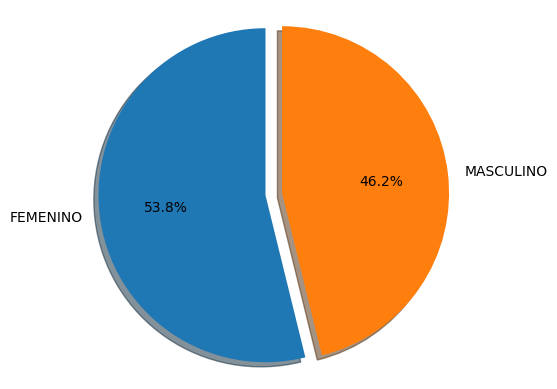

In [39]:

genero = conteo_genero['genero'].to_list()
cantidad = conteo_genero['cantidad'].to_list()

labels = genero
sizes = cantidad
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Uso de PyGWlker

In [ ]:
!pip install pygwalker

In [40]:
import pygwalker as pyg

In [41]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-000635f9c86477b3ad7RUMZyTH02fwAE" style="height: auto">\n    <hea…

# Generación de gráfico con Bokeh

In [ ]:
!pip install bokeh

## Realizamos el agrupamiento por carrera

In [57]:
conteo = (
    df.group_by('carrera')
    .agg([
        pl.col('carrera').count().alias('cantidad'),
        pl.col("fecha_reg_aspirante").min().alias('fecha_minima'),
        pl.col("fecha_reg_aspirante").max().alias('fecha_maxima'), 
    ])
    .sort('cantidad', descending=True)
)
conteo

carrera,cantidad,fecha_minima,fecha_maxima
str,u32,str,str
"""ADMINISTRACION DE EMPRESAS""",1647,"""2013-08-14 14:42:38.577""","""2022-06-07 16:43:13.683"""
"""ENFERMERIA""",1548,"""2013-08-14 18:00:35.483""","""2022-06-07 16:43:13.987"""
"""CONTABILIDAD Y AUDITORIA""",1416,"""2013-08-14 17:36:14.437""","""2022-06-07 16:43:13.757"""
"""INGENIERIA CIVIL""",1315,"""2013-08-14 17:41:33.640""","""2022-06-07 16:43:14.050"""
"""DERECHO""",1014,"""2013-08-14 18:00:37.827""","""2022-06-07 16:43:13.800"""
…,…,…,…
"""INFORMATICA""",564,"""2013-08-14 17:50:52.733""","""2016-10-19 19:24:44.000"""
"""INGENIERIA AGROPECUARIA""",460,"""2013-08-14 17:41:33.513""","""2016-10-19 19:25:40.000"""
"""EDUCACION PARVULARIA""",115,"""2013-08-14 18:11:44.403""","""2016-10-19 19:21:32.000"""


In [43]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet

In [44]:
# Mostrar gráficos en el notebook
output_notebook()

Loading BokehJS ...

In [45]:
# Seleccionar las 10 carreras con mayor demanda
top10 = conteo.head(10)

# Datos de ejemplo
categorias = top10['carrera'].to_list()
valores = top10['cantidad'].to_list()

# Preparar la fuente de datos
source = ColumnDataSource(data=dict(
    categorias=categorias,
    valores=valores,
    etiquetas=[f'{v}' for v in valores]
))

# Crear la figura
p = figure(
    x_range=categorias,
    height=550,
    title="Top 10 de las carreras con mayor demanda",
    toolbar_location=None,
    tools=""
)

# Dibujar las barras
p.vbar(x='categorias', top='valores', width=0.6, source=source, fill_color="skyblue")

# Agregar etiquetas con los valores
labels = LabelSet(
    x='categorias',
    y='valores',
    text='etiquetas',
    x_offset=-13, y_offset=5,
    source=source,
    text_font_size="10pt"
)
p.add_layout(labels)

# Ajustes visuales
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.yaxis.axis_label = "Cantidad"

# Mostrar el gráfico
show(p)